Load IRIS dataset, check its contents:


In [11]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [12]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [13]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9666666666666667

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [22]:
import numpy as np
# Choose only first two features and eliminate class 2
mask = iris.target != 2
X_filtered = iris.data[mask, :2]
y_filtered = iris.target[mask]

print(f'New shape: {X_filtered.shape}')

New shape: (100, 2)


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

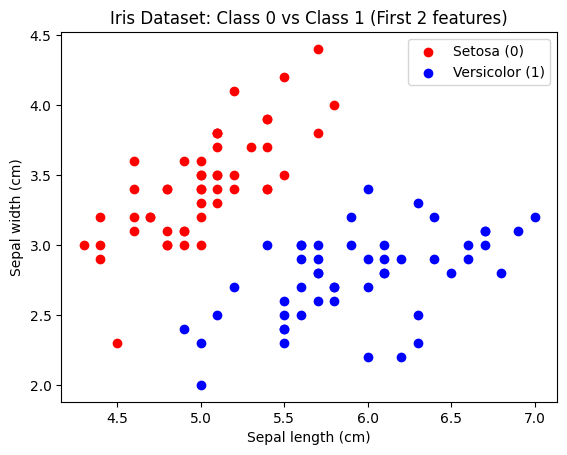

In [25]:
import matplotlib.pyplot as plt

# Scatter plot for class 0
plt.scatter(X_filtered[y_filtered == 0, 0], X_filtered[y_filtered == 0, 1], color='red', label='Setosa (0)')
# Scatter plot for class 1
plt.scatter(X_filtered[y_filtered == 1, 0], X_filtered[y_filtered == 1, 1], color='blue', label='Versicolor (1)')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Iris Dataset: Class 0 vs Class 1 (First 2 features)')
plt.legend()
plt.show()

Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [23]:
from sklearn.svm import SVC
# Split filtered data
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Train SVM with C=200
SVMmodel = SVC(kernel='linear', C=200)
SVMmodel.fit(X_train_f, y_train_f)

print(f'Accuracy: {SVMmodel.score(X_test_f, y_test_f)}')

Accuracy: 1.0


Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

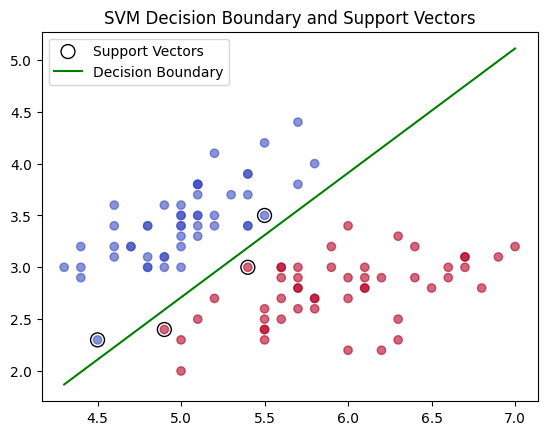

In [26]:
supvectors = SVMmodel.support_vectors_

# Plot the data and support vectors
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered, cmap='coolwarm', alpha=0.6)
plt.scatter(supvectors[:, 0], supvectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Separating line coefficients:
W = SVMmodel.coef_[0]
b = SVMmodel.intercept_[0]

# Plot the decision line: w0*x + w1*y + b = 0  => y = -(w0/w1)*x - b/w1
x_points = np.linspace(X_filtered[:, 0].min(), X_filtered[:, 0].max(), 100)
y_points = -(W[0] / W[1]) * x_points - b / W[1]

plt.plot(x_points, y_points, 'g-', label='Decision Boundary')
plt.legend()
plt.title('SVM Decision Boundary and Support Vectors')
plt.show()

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

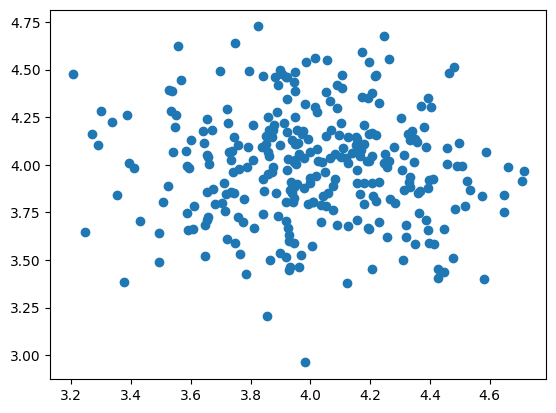

In [18]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

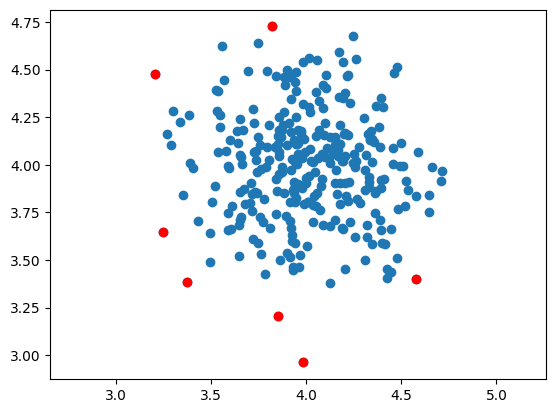

In [19]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

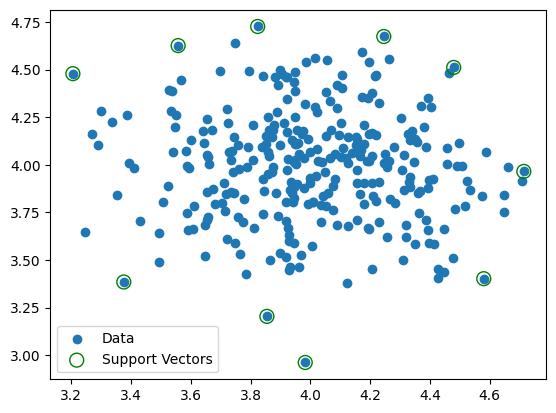

In [24]:
plt.scatter(x[:,0], x[:,1], label='Data')
plt.scatter(SVMmodelOne.support_vectors_[:,0], SVMmodelOne.support_vectors_[:,1],
            s=100, facecolors='none', edgecolors='g', label='Support Vectors')
plt.legend()
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


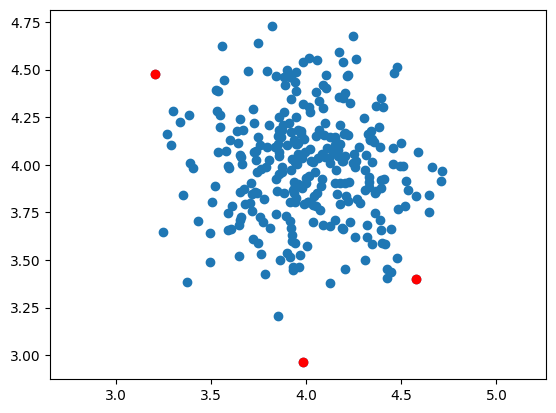

In [21]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()